## Prediction of Profit or Loss in sales with Artificial Neural Networks (ANN)

### by

### Shammah Anucha

In this exercise, I will be predicting profit or loss category for a furniture shop with several branches in the US.The aim of this exercise is to help the company know which cities, products, discount applied are most profitable. The first stage of this exercise is to import the necessary libraries into Jupyter notebook.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

Next step is to import the csv file of the dataset

In [2]:
store = pd.read_csv('C:/Users/user/Documents/Data Analytics/Sample - Superstore.csv')
store.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## Data Preparation

### Data Cleaning

Firstly, I will be checking for any missing data

In [3]:
store.dropna()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


There are currently no missing data in the dataset.

## Visualizing Data

Some relationships between the dataset will be visualized with charts and graphs for better understanding of the data.

In [4]:
# Unique values for all features
store.nunique() 

Row ID           9994
Order ID         5009
Order Date       1237
Ship Date        1334
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              531
State              49
Postal Code       631
Region              4
Product ID       1862
Category            3
Sub-Category       17
Product Name     1850
Sales            5825
Quantity           14
Discount           12
Profit           7287
dtype: int64

### Relationship between Sum/mean of losses and the frequency of each City

In [5]:
# Relationship between Sum of losses in each City
city = store.groupby(by = ['City']).sum()
loss_city = city[city['Profit']<0] # filtering the loss
loss_city = loss_city.reset_index() #resetting index
#changing Profit Column name to Loss
loss_city['Loss'] = loss_city['Profit']
loss_city = loss_city.drop(columns=['Profit'])
loss_city

,City,Row ID,Postal Code,Sales,Quantity,Discount,Loss
0,Abilene,6990,79605,1.3920,2,0.80,-3.7584
1,Akron,97234,930552,2729.9860,65,7.50,-186.6356
2,Allen,9086,300008,290.2060,13,1.50,-39.8775
3,Allentown,49005,126721,853.2520,20,1.90,-226.4504
4,Altoona,7585,33204,20.4510,9,0.90,-1.1835
...,...,...,...,...,...,...,...
111,Waco,38553,460236,606.1072,17,3.12,-520.1034
112,Wheeling,47947,284282,1946.9660,27,1.60,-107.3962
113,Wilson,47443,167358,368.7320,20,2.20,-14.3360
114,York,23392,87015,817.9780,19,2.10,-102.1692


There are 116 cities having losses in this dataset. It would be difficult to represent all in a chart. I have grouped the cities based on the range of the losses

<AxesSubplot:>

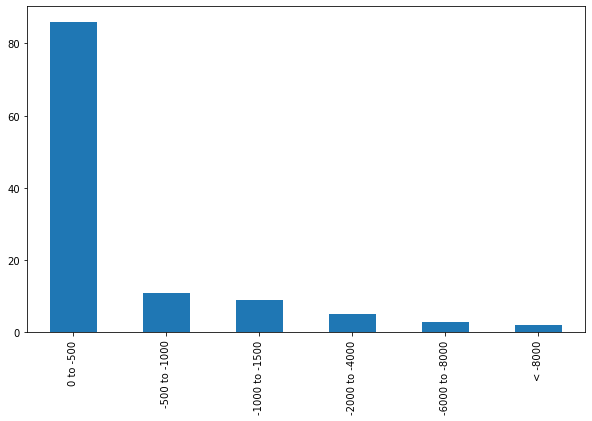

In [6]:
pd.options.mode.chained_assignment = None  # default='warn'
loss_city['loss_class'] = np.nan
for i in range(len(loss_city)):
    if (loss_city['Loss'][i]<0) & (loss_city['Loss'][i]>-501):
        loss_city['loss_class'][i] = '0 to -500'
    elif (loss_city['Loss'][i]<-500) & (loss_city['Loss'][i]>-1001):
        loss_city['loss_class'][i] = "-500 to -1000"
    elif (loss_city['Loss'][i]<-1000) & (loss_city['Loss'][i]>-1501):
        loss_city['loss_class'][i] = "-1000 to -1500"
    elif (loss_city['Loss'][i]<-1500) & (loss_city['Loss'][i]>-2001):
        loss_city['loss_class'][i] = "-1500 to -2000"
    elif (loss_city['Loss'][i]<-2000) & (loss_city['Loss'][i]>-4001):
        loss_city['loss_class'][i] = "-2000 to -4000"
    elif (loss_city['Loss'][i]<-4000) & (loss_city['Loss'][i]>-6001):
        loss_city['loss_class'][i] = "-4000 to -6000"
    elif (loss_city['Loss'][i]<-6000) & (loss_city['Loss'][i]>-8001):
        loss_city['loss_class'][i] = "-6000 to -8000"
    elif (loss_city['Loss'][i]<-8000):
        loss_city['loss_class'][i] = "< -8000"
        
city_bar = loss_city['loss_class'].value_counts()
city_bar.plot(kind ='bar', figsize=(10,6)) #plotting bar chart

The sum of the profit is not a very clear representation of the losses, therefore, the mean of the losses in each city is grouped

In [7]:
# Relationship between Mean of losses in each City
city_mean = store.groupby(by = ['City']).mean()
loss_city_mean = city_mean[city_mean['Profit']<0] # filtering the loss
# changing column name from Profit to Loss
loss_city_mean['Loss'] = loss_city_mean['Profit']
loss_city_mean = loss_city_mean.drop(columns=['Profit'])
loss_city_mean = loss_city_mean.reset_index() # resetting_index
loss_city_mean

,City,Row ID,Postal Code,Sales,Quantity,Discount,Loss
0,Abilene,6990.000000,79605.000000,1.392000,2.000000,0.800000,-3.758400
1,Akron,4630.190476,44312.000000,129.999333,3.095238,0.357143,-8.887410
2,Allen,2271.500000,75002.000000,72.551500,3.250000,0.375000,-9.969375
3,Allentown,7000.714286,18103.000000,121.893143,2.857143,0.271429,-32.350057
4,Altoona,3792.500000,16602.000000,10.225500,4.500000,0.450000,-0.591750
...,...,...,...,...,...,...,...
111,Waco,6425.500000,76706.000000,101.017867,2.833333,0.520000,-86.683900
112,Wheeling,6849.571429,40611.714286,278.138000,3.857143,0.228571,-15.342314
113,Wilson,7907.166667,27893.000000,61.455333,3.333333,0.366667,-2.389333
114,York,4678.400000,17403.000000,163.595600,3.800000,0.420000,-20.433840


<AxesSubplot:>

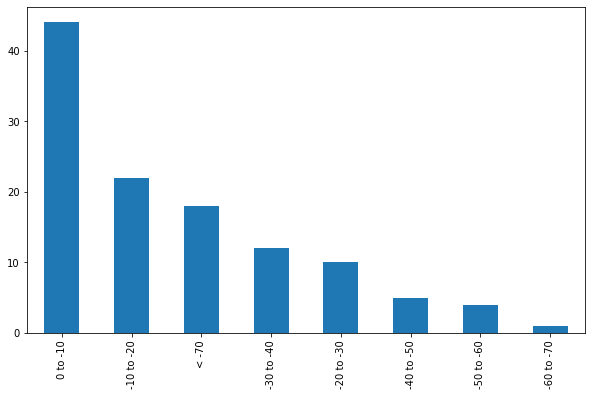

In [8]:
pd.options.mode.chained_assignment = None  # default='warn'
loss_city_mean['loss_class'] = np.nan
for i in range(len(loss_city_mean)):
    if (loss_city_mean['Loss'][i]<0) & (loss_city_mean['Loss'][i]>-11):
        loss_city_mean['loss_class'][i] = '0 to -10'
    elif (loss_city_mean['Loss'][i]<-10) & (loss_city_mean['Loss'][i]>-21):
        loss_city_mean['loss_class'][i] = "-10 to -20"
    elif (loss_city_mean['Loss'][i]<-20) & (loss_city_mean['Loss'][i]>-31):
        loss_city_mean['loss_class'][i] = "-20 to -30"
    elif (loss_city_mean['Loss'][i]<-30) & (loss_city_mean['Loss'][i]>-41):
        loss_city_mean['loss_class'][i] = "-30 to -40"
    elif (loss_city_mean['Loss'][i]<-40) & (loss_city_mean['Loss'][i]>-51):
        loss_city_mean['loss_class'][i] = "-40 to -50"
    elif (loss_city_mean['Loss'][i]<-50) & (loss_city_mean['Loss'][i]>-61):
        loss_city_mean['loss_class'][i] = "-50 to -60"
    elif (loss_city_mean['Loss'][i]<-60) & (loss_city_mean['Loss'][i]>-71):
        loss_city_mean['loss_class'][i] = "-60 to -70"
    elif (loss_city_mean['Loss'][i]<-70):
        loss_city_mean['loss_class'][i] = "< -70"
        
loss_city_mean.head()
city_mean_bar = loss_city_mean['loss_class'].value_counts()
city_mean_bar.plot(kind ='bar', figsize=(10,6)) #plotting bar chart

### Relationship between Sum/mean of losses and the frequency of each Product name

In [9]:
# Relationship between Sum of losses in each Product
product = store.groupby(by = ['Product Name']).sum()
loss_product = product[product['Profit']<0] # filtering the loss
# changing column name from Profit to Loss
loss_product['Loss'] = loss_product['Profit']
loss_product = loss_product.drop(columns=['Profit'])
loss_product = loss_product.reset_index() # resetting_index
loss_product

,Product Name,Row ID,Postal Code,Sales,Quantity,Discount,Loss
0,3.6 Cubic Foot Counter Height Office Refrigerator,36181,349479,2946.200,18,2.6,-872.0752
1,36X48 HARDFLOOR CHAIRMAT,38914,349121,369.248,21,1.4,-40.4914
2,"3D Systems Cube Printer, 2nd Generation, White",14011,125893,2339.982,3,0.7,-467.9964
3,3M Replacement Filter for Office Air Cleaner f...,20493,329972,303.360,14,1.0,-20.4768
4,ARKON Windshield Dashboard Air Vent Car Mount ...,22111,174380,216.960,14,0.4,-15.5940
...,...,...,...,...,...,...,...
296,XtraLife ClearVue Slant-D Ring Binders by Card...,20237,309840,72.912,22,2.5,-13.3280
297,Zebra GK420t Direct Thermal/Thermal Transfer P...,7642,81001,703.710,6,0.7,-938.2800
298,i.Sound Portable Power - 8000 mAh,20117,302447,413.322,9,0.6,-58.8189
299,iOttie HLCRIO102 Car Mount,37162,218554,215.892,12,0.8,-11.9940


There are 301 products having losses in this dataset. It would be difficult to represent all in a chart. I have grouped the cities based on the range of the losses

<AxesSubplot:>

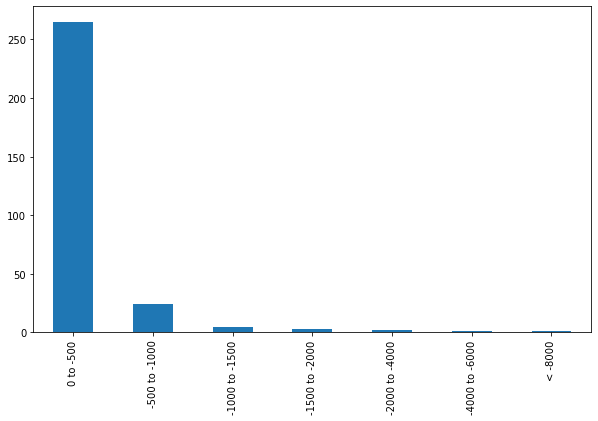

In [10]:
pd.options.mode.chained_assignment = None  # default='warn'
loss_product['loss_class'] = np.nan
for i in range(len(loss_product)):
    if (loss_product['Loss'][i]<0) & (loss_product['Loss'][i]>-501):
        loss_product['loss_class'][i] = '0 to -500'
    elif (loss_product['Loss'][i]<-500) & (loss_product['Loss'][i]>-1001):
        loss_product['loss_class'][i] = "-500 to -1000"
    elif (loss_product['Loss'][i]<-1000) & (loss_product['Loss'][i]>-1501):
        loss_product['loss_class'][i] = "-1000 to -1500"
    elif (loss_product['Loss'][i]<-1500) & (loss_product['Loss'][i]>-2001):
        loss_product['loss_class'][i] = "-1500 to -2000"
    elif (loss_product['Loss'][i]<-2000) & (loss_product['Loss'][i]>-4001):
        loss_product['loss_class'][i] = "-2000 to -4000"
    elif (loss_product['Loss'][i]<-4000) & (loss_product['Loss'][i]>-6001):
        loss_product['loss_class'][i] = "-4000 to -6000"
    elif (loss_product['Loss'][i]<-6000) & (loss_product['Loss'][i]>-8001):
        loss_product['loss_class'][i] = "-6000 to -8000"
    elif (loss_product['Loss'][i]<-8000):
        loss_product['loss_class'][i] = "< -8000"
        
city_bar = loss_product['loss_class'].value_counts()
city_bar.plot(kind ='bar', figsize=(10,6)) #plotting bar chart

In [11]:
# Relationship between Mean of losses in each Product
product_mean = store.groupby(by = ['Product Name']).mean()
loss_product_mean = product_mean[product_mean['Profit']<0] # filtering the loss
# changing column name from Profit to Loss
loss_product_mean['Loss'] = loss_product_mean['Profit']
loss_product_mean = loss_product_mean.drop(columns=['Profit'])
loss_product_mean = loss_product_mean.reset_index() # resetting_index
loss_product_mean

,Product Name,Row ID,Postal Code,Sales,Quantity,Discount,Loss
0,3.6 Cubic Foot Counter Height Office Refrigerator,7236.200000,69895.800000,589.240000,3.6,0.520000,-174.415040
1,36X48 HARDFLOOR CHAIRMAT,6485.666667,58186.833333,61.541333,3.5,0.233333,-6.748567
2,"3D Systems Cube Printer, 2nd Generation, White",7005.500000,62946.500000,1169.991000,1.5,0.350000,-233.998200
3,3M Replacement Filter for Office Air Cleaner f...,5123.250000,82493.000000,75.840000,3.5,0.250000,-5.119200
4,ARKON Windshield Dashboard Air Vent Car Mount ...,5527.750000,43595.000000,54.240000,3.5,0.100000,-3.898500
...,...,...,...,...,...,...,...
296,XtraLife ClearVue Slant-D Ring Binders by Card...,4047.400000,61968.000000,14.582400,4.4,0.500000,-2.665600
297,Zebra GK420t Direct Thermal/Thermal Transfer P...,7642.000000,81001.000000,703.710000,6.0,0.700000,-938.280000
298,i.Sound Portable Power - 8000 mAh,4023.400000,60489.400000,82.664400,1.8,0.120000,-11.763780
299,iOttie HLCRIO102 Car Mount,7432.400000,43710.800000,43.178400,2.4,0.160000,-2.398800


<AxesSubplot:>

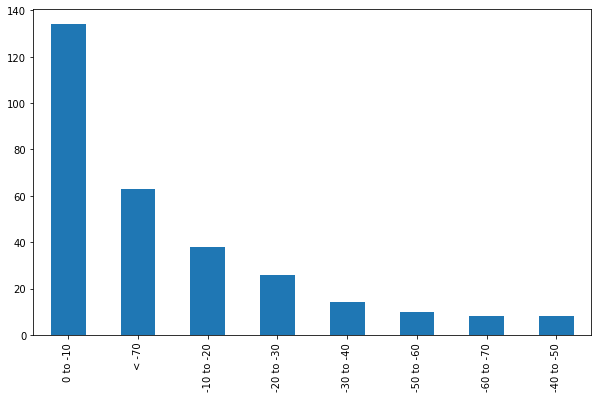

In [12]:
pd.options.mode.chained_assignment = None  # default='warn'
loss_product_mean['loss_class'] = np.nan
for i in range(len(loss_product_mean)):
    if (loss_product_mean['Loss'][i]<0) & (loss_product_mean['Loss'][i]>-11):
        loss_product_mean['loss_class'][i] = '0 to -10'
    elif (loss_product_mean['Loss'][i]<-10) & (loss_product_mean['Loss'][i]>-21):
        loss_product_mean['loss_class'][i] = "-10 to -20"
    elif (loss_product_mean['Loss'][i]<-20) & (loss_product_mean['Loss'][i]>-31):
        loss_product_mean['loss_class'][i] = "-20 to -30"
    elif (loss_product_mean['Loss'][i]<-30) & (loss_product_mean['Loss'][i]>-41):
        loss_product_mean['loss_class'][i] = "-30 to -40"
    elif (loss_product_mean['Loss'][i]<-40) & (loss_product_mean['Loss'][i]>-51):
        loss_product_mean['loss_class'][i] = "-40 to -50"
    elif (loss_product_mean['Loss'][i]<-50) & (loss_product_mean['Loss'][i]>-61):
        loss_product_mean['loss_class'][i] = "-50 to -60"
    elif (loss_product_mean['Loss'][i]<-60) & (loss_product_mean['Loss'][i]>-71):
        loss_product_mean['loss_class'][i] = "-60 to -70"
    elif (loss_product_mean['Loss'][i]<-70):
        loss_product_mean['loss_class'][i] = "< -70"
        
loss_product_mean.head()
product_mean_bar = loss_product_mean['loss_class'].value_counts()
product_mean_bar.plot(kind ='bar', figsize=(10,6)) #plotting bar chart

### Relationship between Sum of losses and the frequency of each Sub-Category

In [13]:
# Relationship between Sum of losses and each Sub-Category
subcategory = store.groupby(by = ['Sub-Category']).sum()
loss_subcategory = subcategory[subcategory['Profit']<0] # filtering the loss
# changing column name from Profit to Loss
loss_subcategory['Loss'] = loss_subcategory['Profit']
loss_subcategory = loss_subcategory.drop(columns=['Profit'])
loss_subcategory = loss_subcategory.reset_index() # resetting_index
loss_subcategory

,Sub-Category,Row ID,Postal Code,Sales,Quantity,Discount,Loss
0,Bookcases,1156535,12771539,114879.9963,868,48.14,-3472.5560
1,Supplies,993554,10633558,46673.5380,647,14.60,-1189.0995
2,Tables,1572664,18607828,206965.5320,1241,83.35,-17725.4811


<AxesSubplot:xlabel='Sub-Category'>

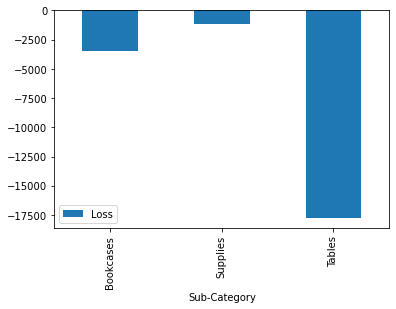

In [14]:
loss_subcategory.plot.bar(x='Sub-Category',y='Loss') #plotting bar chart

## Data Filtration

The important columns that are relevant for this exercise are the city, product name, sub category, sales, quantity, discount and profit. These columns would be filtered into a new dataframe for easy manipulation

In [15]:
filtered = store[['City','Product Name', 'Sub-Category','Sales','Discount','Quantity','Profit']]
filtered

,City,Product Name,Sub-Category,Sales,Discount,Quantity,Profit
0,Henderson,Bush Somerset Collection Bookcase,Bookcases,261.9600,0.00,2,41.9136
1,Henderson,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",Chairs,731.9400,0.00,3,219.5820
2,Los Angeles,Self-Adhesive Address Labels for Typewriters b...,Labels,14.6200,0.00,2,6.8714
3,Fort Lauderdale,Bretford CR4500 Series Slim Rectangular Table,Tables,957.5775,0.45,5,-383.0310
4,Fort Lauderdale,Eldon Fold 'N Roll Cart System,Storage,22.3680,0.20,2,2.5164
...,...,...,...,...,...,...,...
9989,Miami,Ultra Door Pull Handle,Furnishings,25.2480,0.20,3,4.1028
9990,Costa Mesa,Tenex B1-RE Series Chair Mats for Low Pile Car...,Furnishings,91.9600,0.00,2,15.6332
9991,Costa Mesa,Aastra 57i VoIP phone,Phones,258.5760,0.20,2,19.3932
9992,Costa Mesa,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",Paper,29.6000,0.00,4,13.3200


### Label Encoding

For the ANN model to understand the city, product name, and sub-category columns, they need to be converted into numerical values that represent each feature.

In [16]:
from sklearn import preprocessing
pd.options.mode.chained_assignment = None  # default='warn'

pn = preprocessing.LabelEncoder()
pn.fit(filtered["Product Name"])
pne = pn.transform(filtered['Product Name'])
filtered['product_name encoded'] = pne

In [17]:
pd.options.mode.chained_assignment = None  # default='warn'

ct = preprocessing.LabelEncoder()
ct.fit(filtered['City'])
cte = ct.transform(filtered['City'])
filtered['city_encoded'] = cte

In [18]:
pd.options.mode.chained_assignment = None  # default='warn'

sc = preprocessing.LabelEncoder()
sc.fit(filtered['Sub-Category'])
sce = sc.transform(filtered['Sub-Category'])
filtered['sub-category encoded'] = sce

Below is new dataset with the encoded values

In [19]:
filtered.head()

,City,Product Name,Sub-Category,Sales,Discount,Quantity,Profit,product_name encoded,city_encoded,sub-category encoded
0,Henderson,Bush Somerset Collection Bookcase,Bookcases,261.9600,0.00,2,41.9136,386,194,4
1,Henderson,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",Chairs,731.9400,0.00,3,219.5820,839,194,5
2,Los Angeles,Self-Adhesive Address Labels for Typewriters b...,Labels,14.6200,0.00,2,6.8714,1433,266,10
3,Fort Lauderdale,Bretford CR4500 Series Slim Rectangular Table,Tables,957.5775,0.45,5,-383.0310,366,153,16
4,Fort Lauderdale,Eldon Fold 'N Roll Cart System,Storage,22.3680,0.20,2,2.5164,573,153,14


The city, product name and sub category will be dropped as they are no longer needed

In [20]:
filtered = filtered.drop(columns=['City','Product Name','Sub-Category'])
filtered

,Sales,Discount,Quantity,Profit,product_name encoded,city_encoded,sub-category encoded
0,261.9600,0.00,2,41.9136,386,194,4
1,731.9400,0.00,3,219.5820,839,194,5
2,14.6200,0.00,2,6.8714,1433,266,10
3,957.5775,0.45,5,-383.0310,366,153,16
4,22.3680,0.20,2,2.5164,573,153,14
...,...,...,...,...,...,...,...
9989,25.2480,0.20,3,4.1028,1586,295,9
9990,91.9600,0.00,2,15.6332,1535,104,9
9991,258.5760,0.20,2,19.3932,47,104,13
9992,29.6000,0.00,4,13.3200,929,104,12


The Profit column is the dependent variable to be predicted. In the 'Profit' column, there are negative and positive values representing the loss and profit in sales. First, I will encode the positive values to 'profit' and the negative values to 'loss'.

In [21]:
profit_loss = []
for i in filtered['Profit']:
    if i < 0:
        profit_loss.append('loss')
    elif i >= 0:
        profit_loss.append('profit')
print(profit_loss)

['profit', 'profit', 'profit', 'loss', 'profit', 'profit', 'profit', 'profit', 'profit', 'profit', 'profit', 'profit', 'profit', 'profit', 'loss', 'loss', 'profit', 'profit', 'profit', 'profit', 'profit', 'profit', 'profit', 'loss', 'profit', 'profit', 'profit', 'loss', 'loss', 'profit', 'profit', 'profit', 'loss', 'profit', 'profit', 'profit', 'loss', 'profit', 'loss', 'loss', 'profit', 'profit', 'profit', 'profit', 'profit', 'profit', 'profit', 'profit', 'profit', 'profit', 'profit', 'profit', 'profit', 'profit', 'profit', 'profit', 'profit', 'profit', 'profit', 'profit', 'profit', 'profit', 'profit', 'profit', 'profit', 'profit', 'loss', 'profit', 'profit', 'profit', 'profit', 'profit', 'loss', 'profit', 'loss', 'loss', 'loss', 'profit', 'loss', 'profit', 'profit', 'profit', 'profit', 'profit', 'loss', 'profit', 'profit', 'profit', 'profit', 'profit', 'profit', 'profit', 'profit', 'profit', 'profit', 'loss', 'profit', 'profit', 'profit', 'profit', 'loss', 'loss', 'profit', 'loss', '

I will put the result into a dataframe

In [22]:
prolos = pd.DataFrame({'Profit/Loss': profit_loss})
prolos

,Profit/Loss
0,profit
1,profit
2,profit
3,loss
4,profit
...,...
9989,profit
9990,profit
9991,profit
9992,profit


Using the get dummy function, I will encode Profit to class 1 and Loss to class 0  

In [23]:
df = pd.get_dummies(prolos['Profit/Loss'])
df

,loss,profit
0,0,1
1,0,1
2,0,1
3,1,0
4,0,1
...,...,...
9989,0,1
9990,0,1
9991,0,1
9992,0,1


I will use the profit column as the output.

In [24]:
filtered['Profit'] = df['profit']
filtered['Profit/Loss'] = filtered['Profit']
filtered = filtered.drop(columns=['Profit'])
filtered

,Sales,Discount,Quantity,product_name encoded,city_encoded,sub-category encoded,Profit/Loss
0,261.9600,0.00,2,386,194,4,1
1,731.9400,0.00,3,839,194,5,1
2,14.6200,0.00,2,1433,266,10,1
3,957.5775,0.45,5,366,153,16,0
4,22.3680,0.20,2,573,153,14,1
...,...,...,...,...,...,...,...
9989,25.2480,0.20,3,1586,295,9,1
9990,91.9600,0.00,2,1535,104,9,1
9991,258.5760,0.20,2,47,104,13,1
9992,29.6000,0.00,4,929,104,12,1


The filtered 'Profit' column has been replaced.

In [25]:
#Checking the length of the Profit and Loss rows...
filtered['Profit/Loss'].value_counts()

1    8123
0    1871
Name: Profit/Loss, dtype: int64

Class 1 is 8123 and class 0 is 1871. This means there is an imbalance in the dataset.
The random under sampling technique is used to equalize the profit and loss. The Profit will be reduced to the length of the loss.

In [26]:
# class count
class_count_1, class_count_0 = filtered['Profit/Loss'].value_counts()

# Separate class
class_0 = filtered[filtered['Profit/Loss'] == 0]
class_1 = filtered[filtered['Profit/Loss'] == 1]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (1871, 7)
class 1: (8123, 7)


total class of 1 and 0: 0    1871
1    1871
Name: Profit/Loss, dtype: int64


<AxesSubplot:title={'center':'count (target)'}>

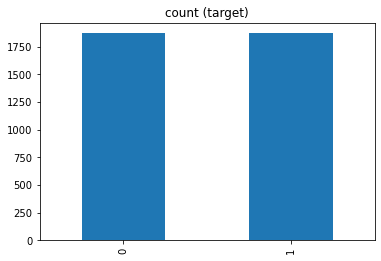

In [27]:
class_1_under = class_1.sample(class_count_0)

filtered1 = pd.concat([class_1_under, class_0], axis=0)

print("total class of 1 and 0:",filtered1['Profit/Loss'].value_counts())# plot the count after under-sampeling
filtered1['Profit/Loss'].value_counts().plot(kind='bar', title='count (target)')

In [28]:
filtered1

,Sales,Discount,Quantity,product_name encoded,city_encoded,sub-category encoded,Profit/Loss
4342,19.8240,0.20,6,32,438,3,1
5127,601.3000,0.00,2,859,329,1,1
316,99.1360,0.20,4,363,374,2,1
5305,68.9500,0.00,5,31,343,9,1
9750,5.3440,0.20,2,244,80,2,1
...,...,...,...,...,...,...,...
9920,22.3860,0.80,7,698,55,3,0
9921,5.7420,0.70,3,60,2,3,0
9931,683.3320,0.15,4,1189,435,4,0
9937,71.0880,0.20,2,835,266,16,0


The dataframe will now be normalized to a range between 0 and 1 using the MinMaxScaler

In [29]:
scaled = filtered1
cols_to_scale = ['Sales','Quantity','Discount','product_name encoded','city_encoded','sub-category encoded']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaled[cols_to_scale] = scaler.fit_transform(scaled[cols_to_scale])
scaled

,Sales,Discount,Quantity,product_name encoded,city_encoded,sub-category encoded,Profit/Loss
4342,0.000856,0.2500,0.384615,0.016775,0.826087,0.1875,1
5127,0.026542,0.0000,0.076923,0.464286,0.620038,0.0625,1
316,0.004360,0.2500,0.230769,0.195887,0.705104,0.1250,1
5305,0.003026,0.0000,0.307692,0.016234,0.646503,0.5625,1
9750,0.000216,0.2500,0.076923,0.131494,0.149338,0.1250,1
...,...,...,...,...,...,...,...
9920,0.000969,1.0000,0.461538,0.377165,0.102079,0.1875,0
9921,0.000234,0.8750,0.153846,0.031926,0.001890,0.1875,0
9931,0.030166,0.1875,0.230769,0.642857,0.820416,0.2500,0
9937,0.003121,0.2500,0.076923,0.451299,0.500945,1.0000,0


In [30]:
# resetting index to start from 0
scaled = scaled.reset_index()
scaled

,index,Sales,Discount,Quantity,product_name encoded,city_encoded,sub-category encoded,Profit/Loss
0,4342,0.000856,0.2500,0.384615,0.016775,0.826087,0.1875,1
1,5127,0.026542,0.0000,0.076923,0.464286,0.620038,0.0625,1
2,316,0.004360,0.2500,0.230769,0.195887,0.705104,0.1250,1
3,5305,0.003026,0.0000,0.307692,0.016234,0.646503,0.5625,1
4,9750,0.000216,0.2500,0.076923,0.131494,0.149338,0.1250,1
...,...,...,...,...,...,...,...,...
3737,9920,0.000969,1.0000,0.461538,0.377165,0.102079,0.1875,0
3738,9921,0.000234,0.8750,0.153846,0.031926,0.001890,0.1875,0
3739,9931,0.030166,0.1875,0.230769,0.642857,0.820416,0.2500,0
3740,9937,0.003121,0.2500,0.076923,0.451299,0.500945,1.0000,0


In [31]:
scaled = scaled.drop(columns = ['index']) #dropping index column
scaled

,Sales,Discount,Quantity,product_name encoded,city_encoded,sub-category encoded,Profit/Loss
0,0.000856,0.2500,0.384615,0.016775,0.826087,0.1875,1
1,0.026542,0.0000,0.076923,0.464286,0.620038,0.0625,1
2,0.004360,0.2500,0.230769,0.195887,0.705104,0.1250,1
3,0.003026,0.0000,0.307692,0.016234,0.646503,0.5625,1
4,0.000216,0.2500,0.076923,0.131494,0.149338,0.1250,1
...,...,...,...,...,...,...,...
3737,0.000969,1.0000,0.461538,0.377165,0.102079,0.1875,0
3738,0.000234,0.8750,0.153846,0.031926,0.001890,0.1875,0
3739,0.030166,0.1875,0.230769,0.642857,0.820416,0.2500,0
3740,0.003121,0.2500,0.076923,0.451299,0.500945,1.0000,0


## Relationship Between Discount Applied and Profit/Loss

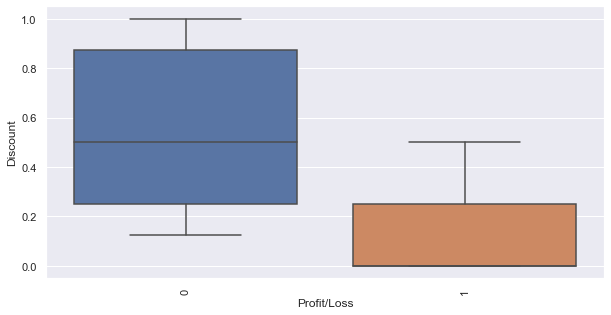

In [32]:
import seaborn as sn
sn.set(rc={'figure.figsize':(10,5)})
ax = sn.boxplot(x = 'Profit/Loss', y ='Discount', data = scaled)
ax.tick_params(axis='x', rotation=90)

The discount given affects the profit. From the boxplot below, the major losses incurred were because of the large discounts applied to each sale. The discounts between 25% and 85% experienced the major losses. The company still made profit with little discounts applied between 0% and 25%.
From the correlation between the discount applied and the profit/loss is high (-0.74) 

In [33]:
scaled.corr()

,Sales,Discount,Quantity,product_name encoded,city_encoded,sub-category encoded,Profit/Loss
Sales,1.000000,-0.054006,0.210242,-0.018921,0.014404,0.113159,-0.027359
Discount,-0.054006,1.000000,0.035226,-0.124378,-0.177824,-0.257027,-0.740453
Quantity,0.210242,0.035226,1.000000,0.035289,-0.005478,-0.042403,0.002461
product_name encoded,-0.018921,-0.124378,0.035289,1.000000,0.013905,0.054923,0.081504
city_encoded,0.014404,-0.177824,-0.005478,0.013905,1.000000,0.020429,0.142009
sub-category encoded,0.113159,-0.257027,-0.042403,0.054923,0.020429,1.000000,0.043189
Profit/Loss,-0.027359,-0.740453,0.002461,0.081504,0.142009,0.043189,1.000000


## Declaring Independent and Dependent Variables

In [34]:
X = scaled.drop(columns = ['Profit/Loss'])
Y = scaled['Profit/Loss']

## Splitting Training and Testing Data

To train this ANN model, I will be splitting the dataset. 70 percent will be used to train the model and 30 percent will be used to test the model

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=5)

In [36]:
# The train and test size of X
X_train.shape, X_test.shape

((2619, 6), (1123, 6))

In [37]:
len(X_train.columns)

6

## Training the ANN Model

In [38]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(3, input_shape = (6,), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

# I fit the model here and let it run for 100 epochs.
training = model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = 100)

Epoch 1/100
82/82 [==============================] - 2s 7ms/step - loss: 0.6887 - accuracy: 0.4975 - val_loss: 0.6630 - val_accuracy: 0.5147
Epoch 2/100
82/82 [==============================] - 0s 4ms/step - loss: 0.6532 - accuracy: 0.5372 - val_loss: 0.6286 - val_accuracy: 0.6055
Epoch 3/100
82/82 [==============================] - 0s 3ms/step - loss: 0.6165 - accuracy: 0.7026 - val_loss: 0.5933 - val_accuracy: 0.8005
Epoch 4/100
82/82 [==============================] - 0s 3ms/step - loss: 0.5785 - accuracy: 0.7881 - val_loss: 0.5571 - val_accuracy: 0.8032
Epoch 5/100
82/82 [==============================] - 0s 3ms/step - loss: 0.5400 - accuracy: 0.8053 - val_loss: 0.5211 - val_accuracy: 0.8032
Epoch 6/100
82/82 [==============================] - 0s 3ms/step - loss: 0.5045 - accuracy: 0.8194 - val_loss: 0.4882 - val_accuracy: 0.8103
Epoch 7/100
82/82 [==============================] - 0s 3ms/step - loss: 0.4730 - accuracy: 0.8225 - val_loss: 0.4592 - val_accuracy: 0.8192
Epoch 8/100
8

Epoch 59/100
82/82 [==============================] - 0s 4ms/step - loss: 0.2553 - accuracy: 0.8603 - val_loss: 0.2564 - val_accuracy: 0.8584
Epoch 60/100
82/82 [==============================] - 0s 3ms/step - loss: 0.2551 - accuracy: 0.8595 - val_loss: 0.2564 - val_accuracy: 0.8584
Epoch 61/100
82/82 [==============================] - 0s 3ms/step - loss: 0.2553 - accuracy: 0.8561 - val_loss: 0.2568 - val_accuracy: 0.8504
Epoch 62/100
82/82 [==============================] - 0s 3ms/step - loss: 0.2553 - accuracy: 0.8595 - val_loss: 0.2566 - val_accuracy: 0.8495
Epoch 63/100
82/82 [==============================] - 0s 4ms/step - loss: 0.2546 - accuracy: 0.8595 - val_loss: 0.2567 - val_accuracy: 0.8522
Epoch 64/100
82/82 [==============================] - 0s 4ms/step - loss: 0.2542 - accuracy: 0.8614 - val_loss: 0.2572 - val_accuracy: 0.8513
Epoch 65/100
82/82 [==============================] - 0s 3ms/step - loss: 0.2542 - accuracy: 0.8610 - val_loss: 0.2571 - val_accuracy: 0.8513
Epoch 

### Evaluating the Testing Model

In [39]:
model.evaluate(X_test,Y_test)

36/36 [==============================] - 0s 2ms/step - loss: 0.2517 - accuracy: 0.8584


[0.2516578137874603, 0.8584149479866028]

In [40]:
# predicting the Y values
ypred = model.predict(X_test)
ypred[:10]

array([[7.1179867e-04],
       [9.9307191e-01],
       [5.9118295e-01],
       [9.9418044e-01],
       [9.9257123e-01],
       [9.9307787e-01],
       [9.8859251e-01],
       [6.3790107e-01],
       [4.5633534e-01],
       [9.4445229e-01]], dtype=float32)

In [41]:
# Y_test values
Y_test[:10]

3564    0
1591    1
1528    1
1747    1
1841    1
1685    1
569     1
1847    1
2259    0
297     1
Name: Profit/Loss, dtype: uint8

In [42]:
# converting ypred to 1 and 0
Y_pred = []
for element in ypred:
    if element > 0.5:
        Y_pred.append(1)
    else:
        Y_pred.append(0)

In [43]:
#comparing the predicted and testing values
Y_pred[:10]

[0, 1, 1, 1, 1, 1, 1, 1, 0, 1]

From the Y_pred values we can see that the model predicted all values right but one

## Classification Report

In [44]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.94      0.77      0.85       569
           1       0.80      0.95      0.87       554

    accuracy                           0.86      1123
   macro avg       0.87      0.86      0.86      1123
weighted avg       0.87      0.86      0.86      1123



The recall value of the classification report means that 77% of the class type 0 was found and 
interpreted. While 95% of the class type 1 were found and interpreted. In general, this means that the 
classifier can find class 1 than class 0.

The precision value means that the classifier can accurately predict 94% of the class 0 type that was 
found and predict 80% of the class 1 type that was found.

The f1-score means that the harmony of the precision value and the recall value of the class 0 type is 
85% while that of the class 1 type is 87%.

The support means that class 0 has a total of 569 elements in the dataset and class 1 has a total of 554 
elements in the dataset. This dataset is balanced and the accuracy of 86% is suitable for 
deployment.

## Confusion Matrix

Text(66.5, 0.5, 'Truth')

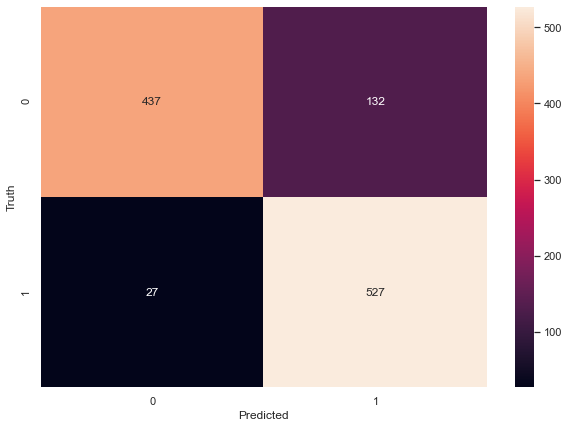

In [45]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=Y_test,predictions = Y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

The confusion matrix shows that the model predicted 527 of the testing data correctly as profit and 27
incorrectly as loss while 437 of the testing were predicted correctly as loss and 132 incorrectly as profit.

In [46]:
print(training.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


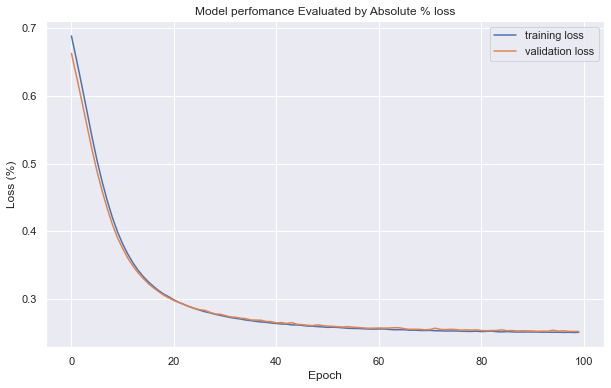

In [47]:
# "Loss Plot 
plt.rcParams['figure.figsize'] = [10, 6]
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('Model perfomance Evaluated by Absolute % loss')
plt.ylabel('Loss (%)')
plt.xlabel('Epoch')
plt.legend(['training loss', 'validation loss'], loc='upper right')
plt.show()


## SUMMARY

The ANN Machine Learning model predicts the profit and loss classes well with an overall accuracy of 85%